In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Datasets/

/content/drive/MyDrive/Datasets


In [ ]:
!unzip Tree_Species.zip -d extracted_data/

Archive:  Tree_Species.zip
replace extracted_data/Tree_Species_Dataset/.git/HEAD? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: extracted_data/Tree_Species_Dataset/.git/HEAD  
  inflating: extracted_data/Tree_Species_Dataset/.git/config  
  inflating: extracted_data/Tree_Species_Dataset/.git/description  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/applypatch-msg.sample  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/commit-msg.sample  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/fsmonitor-watchman.sample  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/post-update.sample  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/pre-applypatch.sample  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/pre-commit.sample  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/pre-merge-commit.sample  
  inflating: extracted_data/Tree_Species_Dataset/.git/hooks/pre-push.sample  
  inflating: extracted_da

In [ ]:
data_dir = '/content/drive/MyDrive/Datasets/extracted_data/Tree_Species_Dataset'

In [ ]:
print(data_dir)

/content/drive/MyDrive/Datasets/extracted_data/Tree_Species_Dataset


In [ ]:
import os
print("class folder:")
print(os.listdir(data_dir))

class folder:
['.git', 'amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


In [ ]:
import os
from PIL import Image

corrupt_images = []

# Code to identify corrupted images (originally in cell 0U1zFP43gU2u)
for class_name in os.listdir(data_dir):
    class_folder = os.path.join(data_dir, class_name)
    if os.path.isdir(class_folder) and class_name != '.git':
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            try:
                img = Image.open(img_path)
                img.verify()
            except Exception as e:
                corrupt_images.append(img_path)

print("Corrupted images identified:", len(corrupt_images))


# Code to remove corrupted images (originally in this cell)
for img_path in corrupt_images:
    try:
        os.remove(img_path)
        print(f"Removed corrupted image: {img_path}")
    except OSError as e:
        print(f"Error removing image {img_path}: {e}")

print(f"Finished removing {len(corrupt_images)} corrupted images.")

Corrupted images identified: 0
Finished removing 0 corrupted images.


In [ ]:
from genericpath import isdir
import glob
image_paths=[]
labels=[]
for class_name in os.listdir(data_dir):
  class_folder=os.path.join(data_dir,class_name)
  if os.path.isdir(class_folder):
    for img_file in os.listdir(class_folder):
      image_paths.append(os.path.join(class_folder,img_file))
      labels.append(class_name)
print(f"Total images: {len(image_paths)}")

Total images: 1605


In [ ]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, cls)) and cls != '.git'}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

        Image Count
other           150
amla             50
babul            50
bamboo           50
banyan           50
shape:  (30, 1)


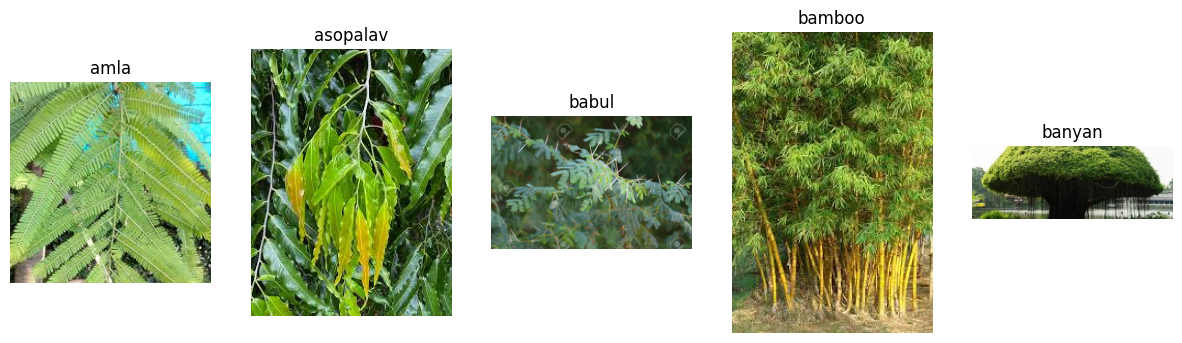

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def show_sample_images(data_dir, class_list, n=5):
    plt.figure(figsize=(15, 10))
    image_classes = [c for c in class_list if c != '.git'] # Exclude .git folder
    for i, class_name in enumerate(image_classes[:n]):
        class_folder = os.path.join(data_dir, class_name)
        if os.path.isdir(class_folder):
            img_files = os.listdir(class_folder)
            if img_files: # Check if the folder is not empty
                img_path = os.path.join(class_folder, img_files[0])
                img = Image.open(img_path)
                plt.subplot(1, n, i+1)
                plt.imshow(img)
                plt.title(class_name)
                plt.axis('off')
    plt.show()

show_sample_images(data_dir, class_counts)

In [ ]:
image_shapes = []

for class_name in os.listdir(data_dir):
    class_folder = os.path.join(data_dir, class_name)
    if os.path.isdir(class_folder) and class_name != '.git':
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            try:
                img = Image.open(img_path)
                image_shapes.append(img.size)
            except UnidentifiedImageError:
                print(f"Could not identify image file: {img_path}")


# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

,Width,Height
0,225,225
1,1025,1390
2,839,921
3,224,225
4,154,326


In [ ]:
print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [ ]:
import hashlib
from collections import defaultdict
import os

hashes = defaultdict(list)

for class_name in class_counts:
    class_folder = os.path.join(data_dir, class_name)
    if os.path.isdir(class_folder) and class_name != '.git':
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            if os.path.isfile(img_path): # Check if it's a file before opening
                with open(img_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 82


In [ ]:

corrupt_images = []

for class_count in class_counts:
    for img_file in os.listdir(os.path.join(data_dir, class_count)):
        img_path = os.path.join(data_dir, class_count, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 0


Duplicate set 1:


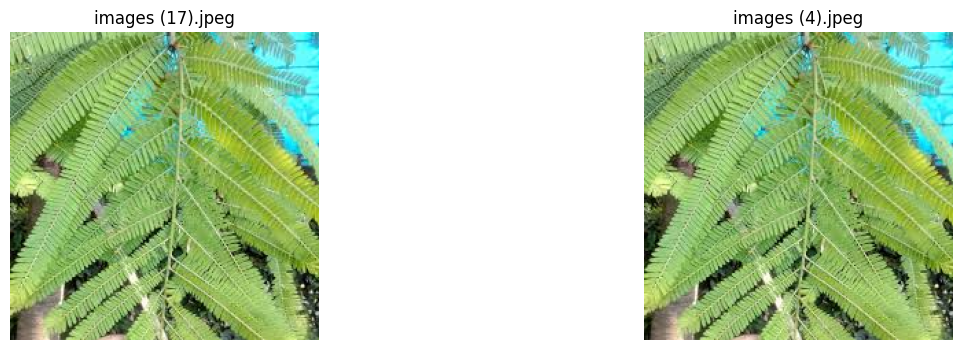

Duplicate set 2:


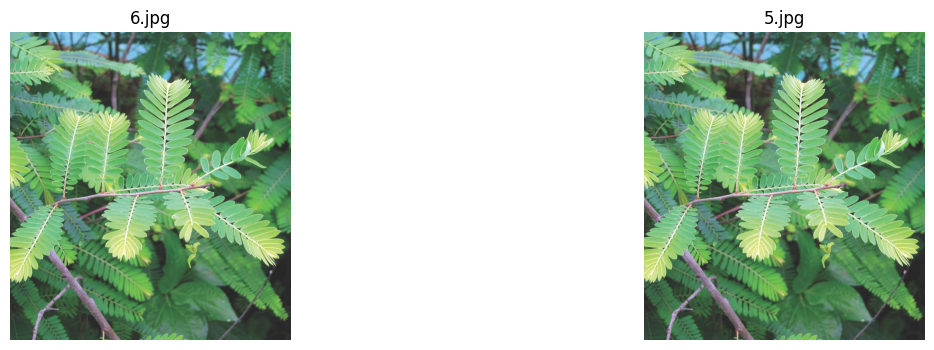

Duplicate set 3:


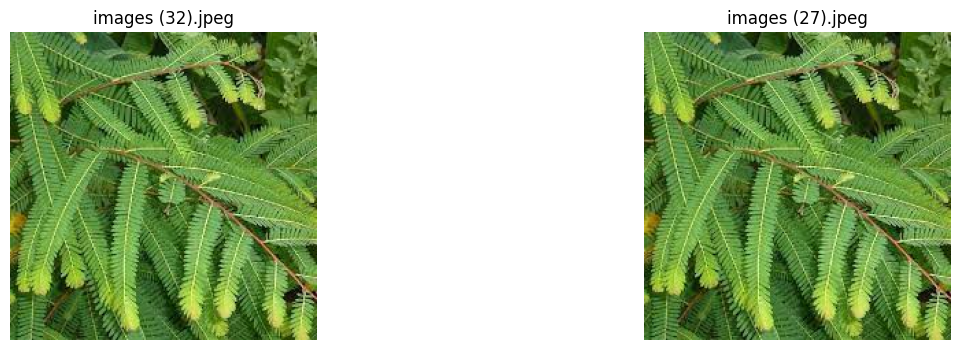

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)


In [ ]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 86 duplicate images.


In [ ]:
hashes = defaultdict(list)

for class_name in class_count:
    class_folder = os.path.join(data_dir, class_name)
    if os.path.isdir(class_folder) and class_name != '.git':
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            if os.path.isfile(img_path): # Check if it's a file before opening
                with open(img_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate Remaining:", len(duplicates))

Duplicate Remaining: 0


In [ ]:
from PIL import Image
import pandas as pd
import os

# Gather image info
image_info = []

for class_name in class_counts.keys(): # Iterate through the keys of the class_counts dictionary
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path) and class_name != '.git':
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    image_info.append({
                        'path': img_path,
                        'width': width,
                        'height': height,
                        'class': class_name
                    })
            except Exception as e:
                print(f"Could not process image file {img_path}: {e}")


df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 20
🔺 Very large images: 40


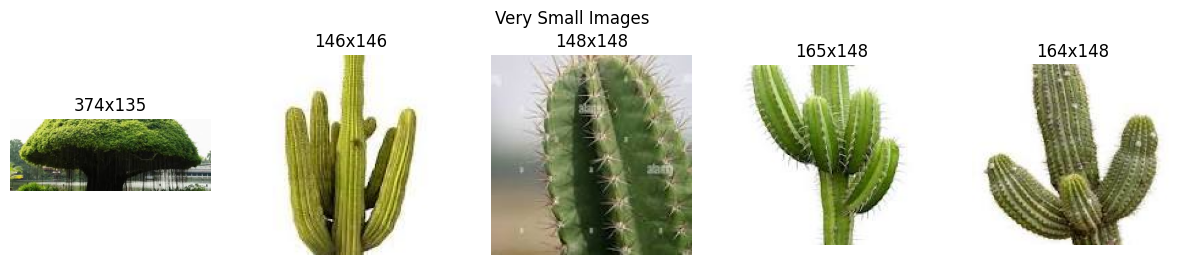

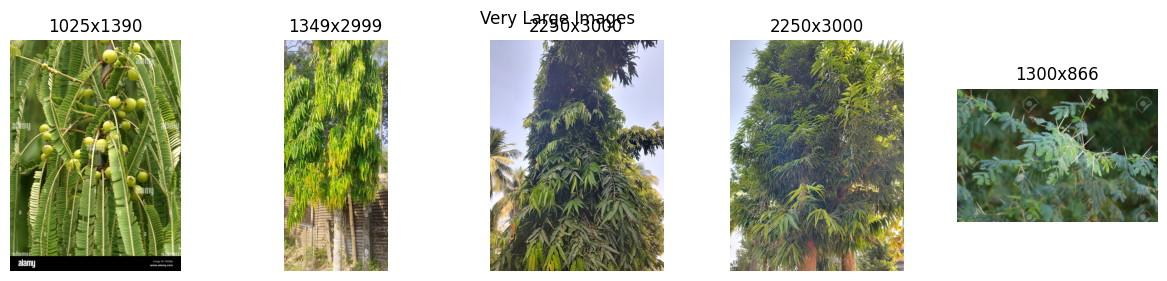

In [ ]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [ ]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 60 outlier images (small + large).


In [ ]:
# Recalculate sizes
image_info = []

for class_name in class_counts.keys(): # Iterate through the keys of the class_counts dictionary
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path) and class_name != '.git':
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    image_info.append({
                        'path': img_path,
                        'width': width,
                        'height': height,
                        'class': class_name
                    })
            except Exception as e:
                # It's good practice to print the error for debugging
                print(f"Could not process image file {img_path}: {e}")


df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.0584 - loss: 3.4578 - val_accuracy: 0.0903 - val_loss: 3.3999
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 637ms/step - accuracy: 0.0544 - loss: 3.4360 - val_accuracy: 0.0903 - val_loss: 3.3859
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 641ms/step - accuracy: 0.0916 - loss: 3.4135 - val_accuracy: 0.0903 - val_loss: 3.3912
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 607ms/step - accuracy: 0.0809 - loss: 3.4059 - val_accuracy: 0.0903 - val_loss: 3.3830
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 640ms/step - accuracy: 0.0841 - loss: 3.4098 - val_accuracy: 0.0903 - val_loss: 3.3874
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 641ms/step - accuracy: 0.0819 - loss: 3.4043 - val_accuracy: 0.0903 - val_loss: 3.3858
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 630ms/step - accuracy: 0.0731 - loss: 3.3954 - val_accuracy: 0.0903 - val_loss: 3.3740
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 627ms/step - accuracy: 0.1006 - loss: 3.3649 - val_accurac

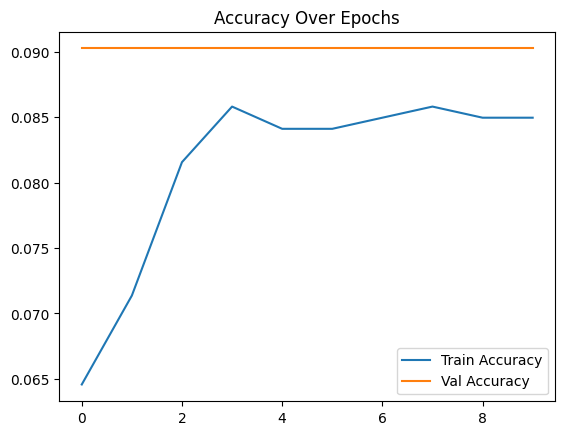

In [ ]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 37s 809ms/step - accuracy: 0.0548 - loss: 4.1033 - val_accuracy: 0.0903 - val_loss: 3.3569
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 777ms/step - accuracy: 0.0926 - loss: 3.3288 - val_accuracy: 0.1083 - val_loss: 3.1123
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 640ms/step - accuracy: 0.1182 - loss: 3.1310 - val_accuracy: 0.1625 - val_loss: 2.9700
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 602ms/step - accuracy: 0.1491 - loss: 2.9782 - val_accuracy: 0.2130 - val_loss: 2.7731
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 635ms/step - accuracy: 0.1747 - loss: 2.9057 - val_accuracy: 0.2058 - val_loss: 2.7320
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 609ms/step - accuracy: 0.2155 - loss: 2.7786 - val_accuracy: 0.2347 - val_loss: 2.6832
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 640ms/step - accuracy: 0.2073 - loss: 2.7096 - val_accuracy: 0.2419 - val_loss: 2.6051
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 618ms/step - accuracy: 0.2512 - loss: 2.6235 - val_accu

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


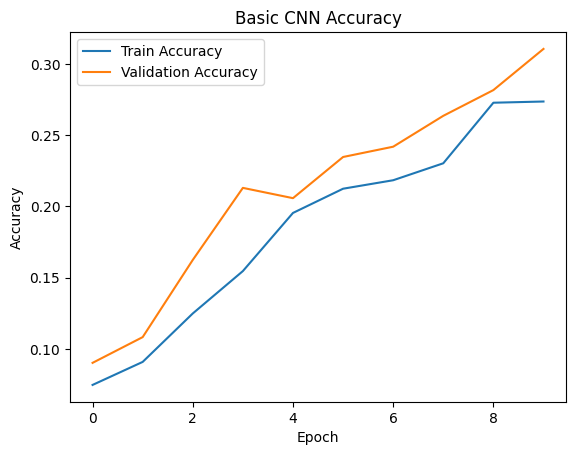

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(31, activation='softmax')  # For 31 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")


Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 35s 742ms/step - accuracy: 0.0830 - loss: 5.3714 - val_accuracy: 0.0361 - val_loss: 6.8766
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 668ms/step - accuracy: 0.1316 - loss: 3.1909 - val_accuracy: 0.0361 - val_loss: 11.6160
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 618ms/step - accuracy: 0.1322 - loss: 3.1672 - val_accuracy: 0.0361 - val_loss: 17.1881
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 645ms/step - accuracy: 0.1416 - loss: 3.1401 - val_accuracy: 0.0361 - val_loss: 18.8020
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 648ms/step - accuracy: 0.1453 - loss: 3.0991 - val_accuracy: 0.0361 - val_loss: 20.7801
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 649ms/step - accuracy: 0.1688 - loss: 3.0958 - val_accuracy: 0.0361 - val_loss: 19.4111
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 29s 782ms/step - accuracy: 0.1622 - loss: 3.0297 - val_accuracy: 0.0361 - val_loss: 19.6683
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 642ms/step - accuracy: 0.1693 - loss: 3.0743 - va